# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np
import seaborn as sns

#Adding inbuilt function to enable entire view of an output or results
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col = None)
properties.head(10)

Unnamed: 0 City of London Barking & Dagenham     Barnet     Bexley  \
0        NaT      E09000001          E09000002  E09000003  E09000004   
1 1995-01-01          91449            50460.2    93284.5    64958.1   
2 1995-02-01        82202.8            51085.8    93190.2    64787.9   
3 1995-03-01        79120.7              51269    92247.5    64367.5   
4 1995-04-01        77101.2            53133.5    90762.9    64277.7   
5 1995-05-01        84409.1            53042.2      90258    63997.1   
6 1995-06-01        94900.5            53700.3    90107.2    64252.3   
7 1995-07-01         110128            52113.1    91441.2    63722.7   
8 1995-08-01         112329            52232.2    92361.3    64432.6   
9 1995-09-01         104473            51471.6    93273.1    64509.5   

       Brent    Bromley     Camden    Croydon     Ealing    Enfield  \
0  E09000005  E09000006  E09000007  E09000008  E09000009  E09000010   
1    71306.6    81671.5     120933    69158.2    79885.9    72514.7   
2    72022.3    81657.6     119509    68951.1    80897.1    73155.2   
3    72015.8    81449.3     120282    68712.4    81379.9    72190.4   
4    72965.6    81124.4     120098      68610    82188.9    71442.9   
5      73704    81542.6     119929    68844.9    82077.1    70630.8   
6    74310.5    82382.8     121887    69052.5    81630.7    71348.3   
7      74127    82898.5     124028    69142.5    82352.2    71837.5   
8      73547    82054.4     125530    68993.4    82706.7    72237.9   
9    73789.5    81440.4     120597    69393.5    82011.1    71725.2   

   Greenwich    Hackney Hammersmith & Fulham   Haringey     Harrow   Havering  \
0  E09000011  E09000012            E09000013  E09000014  E09000015  E09000016   
1    62300.1    61296.5               124903    76287.6    84769.5    68000.1   
2    60993.3    63187.1               122088    78901.2    83396.1    69393.5   
3    61377.8    63593.3               120636    78521.9    83416.2      69368   
4    61927.7    65139.6               121425    79545.6    83567.9    69444.3   
5      63513      66194               124434      79374    83853.7    68534.5   
6    64751.6    66921.2               126175    79956.4    84173.2    68464.6   
7    65486.3    68390.8               124382    80746.3    84226.7    68680.8   
8    65076.4    68096.8               123625    81217.7    84430.6    69023.4   
9    63996.8    68752.5               123094    82142.9      83607    68108.2   

  Hillingdon   Hounslow  Islington Kensington & Chelsea Kingston upon Thames  \
0  E09000017  E09000018  E09000019            E09000020            E09000021   
1    73834.8    72231.7    92516.5               182695              80875.8   
2    75031.1    71051.6    94342.4               182345              81230.1   
3    74188.7      72098    93465.9               182879              81111.5   
4    73911.4    71890.3    93344.5               184177              81672.8   
5    73117.1    72877.5    94346.4               191474              82123.5   
6      74005    72331.1    97428.9               197266              82205.7   
7    74671.1    73717.8    98976.1               197963              82525.8   
8    74967.9    74479.9    98951.2               198037              83342.8   
9    73843.6    74426.7    99582.6               197048                85111   

     Lambeth   Lewisham     Merton     Newham  Redbridge Richmond upon Thames  \
0  E09000022  E09000023  E09000024  E09000025  E09000026            E09000027   
1      67771    60491.3    82070.6    53539.3    72189.6               109326   
2    65381.5    60869.3    79982.7    53153.9    72141.6               111103   
3    66336.5      60288    80661.7    53458.3    72501.4               107325   
4    66388.8      59471    79990.5    54479.8    72228.6               106875   
5    69035.1    58551.4      80874      55804    72366.6               107708   
6    68881.2    58041.4    80704.9    56067.8    72279.4               112865   
7    6

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

In [3]:
#IN THIS SECTION, THE UNKNOWN COLUMNS 'UNNAMED: 0' MUST BE RENAMED.
properties.rename(columns = {'Unnamed: 0': 'Date'}, inplace = True)
print(properties.shape)
properties.head(3)

(317, 49)


Date City of London Barking & Dagenham     Barnet     Bexley  \
0        NaT      E09000001          E09000002  E09000003  E09000004   
1 1995-01-01          91449            50460.2    93284.5    64958.1   
2 1995-02-01        82202.8            51085.8    93190.2    64787.9   

       Brent    Bromley     Camden    Croydon     Ealing    Enfield  \
0  E09000005  E09000006  E09000007  E09000008  E09000009  E09000010   
1    71306.6    81671.5     120933    69158.2    79885.9    72514.7   
2    72022.3    81657.6     119509    68951.1    80897.1    73155.2   

   Greenwich    Hackney Hammersmith & Fulham   Haringey     Harrow   Havering  \
0  E09000011  E09000012            E09000013  E09000014  E09000015  E09000016   
1    62300.1    61296.5               124903    76287.6    84769.5    68000.1   
2    60993.3    63187.1               122088    78901.2    83396.1    69393.5   

  Hillingdon   Hounslow  Islington Kensington & Chelsea Kingston upon Thames  \
0  E09000017  E09000018  E09000019            E09000020            E09000021   
1    73834.8    72231.7    92516.5               182695              80875.8   
2    75031.1    71051.6    94342.4               182345              81230.1   

     Lambeth   Lewisham     Merton     Newham  Redbridge Richmond upon Thames  \
0  E09000022  E09000023  E09000024  E09000025  E09000026            E09000027   
1      67771    60491.3    82070.6    53539.3    72189.6               109326   
2    65381.5    60869.3    79982.7    53153.9    72141.6               111103   

   Southwark     Sutton Tower Hamlets Waltham Forest Wandsworth Westminster  \
0  E09000028  E09000029     E09000030      E09000031  E09000032   E09000033   
1    67885.2      71537       59865.2        61319.4      88559      133025   
2    64799.1    70893.2       62318.5        60252.1      88641      131468   

   Unnamed: 34 Inner London Outer London  Unnamed: 37 NORTH EAST NORTH WEST  \
0          NaN    E13000001    E13000002          NaN  E12000001  E12000002   
1          NaN        78252      72958.8          NaN    42076.4    43958.5   
2          NaN      75885.7      72937.9          NaN      42572    43925.4   

  YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND     LONDON  \
0          E12000003     E12000004     E12000005       E12000006  E12000007   
1            44803.4       45544.5       48527.5         56701.6    74435.8   
2            44528.8       46051.6       49341.3         56593.6    72777.9   

  SOUTH EAST SOUTH WEST  Unnamed: 47    England  
0  E12000008  E12000009          NaN  E92000001  
1    64018.9    54705.2          NaN    53202.8  
2      63715    54356.1          NaN    53096.2

In [4]:
# AGAIN THE NaT VALUE SHOWN ON FIRST ROW OF Properties HAS TO BE RENAMED TO SIGNIFY WHAT IT SERVES
properties.at[0, 'Date'] = 'Code'
properties.head(3)

Date City of London Barking & Dagenham     Barnet  \
0                 Code      E09000001          E09000002  E09000003   
1  1995-01-01 00:00:00          91449            50460.2    93284.5   
2  1995-02-01 00:00:00        82202.8            51085.8    93190.2   

      Bexley      Brent    Bromley     Camden    Croydon     Ealing  \
0  E09000004  E09000005  E09000006  E09000007  E09000008  E09000009   
1    64958.1    71306.6    81671.5     120933    69158.2    79885.9   
2    64787.9    72022.3    81657.6     119509    68951.1    80897.1   

     Enfield  Greenwich    Hackney Hammersmith & Fulham   Haringey     Harrow  \
0  E09000010  E09000011  E09000012            E09000013  E09000014  E09000015   
1    72514.7    62300.1    61296.5               124903    76287.6    84769.5   
2    73155.2    60993.3    63187.1               122088    78901.2    83396.1   

    Havering Hillingdon   Hounslow  Islington Kensington & Chelsea  \
0  E09000016  E09000017  E09000018  E09000019            E09000020   
1    68000.1    73834.8    72231.7    92516.5               182695   
2    69393.5    75031.1    71051.6    94342.4               182345   

  Kingston upon Thames    Lambeth   Lewisham     Merton     Newham  Redbridge  \
0            E09000021  E09000022  E09000023  E09000024  E09000025  E09000026   
1              80875.8      67771    60491.3    82070.6    53539.3    72189.6   
2              81230.1    65381.5    60869.3    79982.7    53153.9    72141.6   

  Richmond upon Thames  Southwark     Sutton Tower Hamlets Waltham Forest  \
0            E09000027  E09000028  E09000029     E09000030      E09000031   
1               109326    67885.2      71537       59865.2        61319.4   
2               111103    64799.1    70893.2       62318.5        60252.1   

  Wandsworth Westminster  Unnamed: 34 Inner London Outer London  Unnamed: 37  \
0  E09000032   E09000033          NaN    E13000001    E13000002          NaN   
1      88559      133025          NaN        78252      72958.8          NaN   
2      88641      131468          NaN      75885.7      72937.9          NaN   

  NORTH EAST NORTH WEST YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS  \
0  E12000001  E12000002          E12000003     E12000004     E12000005   
1    42076.4    43958.5            44803.4       45544.5       48527.5   
2      42572    43925.4            44528.8       46051.6       49341.3   

  EAST OF ENGLAND     LONDON SOUTH EAST SOUTH WEST  Unnamed: 47    England  
0       E12000006  E12000007  E12000008  E12000009          NaN  E92000001  
1         56701.6    74435.8    64018.9    54705.2          NaN    53202.8  
2         56593.6    72777.9      63715    54356.1          NaN    53096.2

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [5]:
# IN THIS SECTION, WE CHECK FOR MISSING VALUES IN THE DATAFRAME.
# WE ALSO CHECK THE ENTIRE COLUMN LIST, SO WE CAN DETERMINE WHICH OF THE BOROUGHS BELONG TO THE LONDON BOROUGHS
# THERE ARE 32 OF THEM THAT MAKE UP THE LONDON BOROUGHS.
properties.isnull()

Date  City of London  Barking & Dagenham  Barnet  Bexley  Brent  \
0    False           False               False   False   False  False   
1    False           False               False   False   False  False   
2    False           False               False   False   False  False   
3    False           False               False   False   False  False   
4    False           False               False   False   False  False   
5    False           False               False   False   False  False   
6    False           False               False   False   False  False   
7    False           False               False   False   False  False   
8    False           False               False   False   False  False   
9    False           False               False   False   False  False   
10   False           False               False   False   False  False   
11   False           False               False   False   False  False   
12   False           False               False   False   False  False   
13   False           False               False   False   False  False   
14   False           False               False   False   False  False   
15   False           False               False   False   False  False   
16   False           False               False   False   False  False   
17   False           False               False   False   False  False   
18   False           False               False   False   False  False   
19   False           False               False   False   False  False   
20   False           False               False   False   False  False   
21   False           False               False   False   False  False   
22   False           False               False   False   False  False   
23   False           False               False   False   False  False   
24   False           False               False   False   False  False   
25   False           False               False   False   False  False   
26   False           False               False   False   False  False   
27   False           False               False   False   False  False   
28   False           False               False   False   False  False   
29   False           False               False   False   False  False   
30   False           False               False   False   False  False   
31   False           False               False   False   False  False   
32   False           False               False   False   False  False   
33   False           False               False   False   False  False   
34   False           False               False   False   False  False   
35   False           False               False   False   False  False   
36   False           False               False   False   False  False   
37   False           False               False   False   False  False   
38   False           False               False   False   False  False   
39   False           False               False   False   False  False   
40   False           False               False   False   False  False   
41   False           False               False   False   False  False   
42   False           False               False   False   False  False   
43   False           False               False   False   False  False   
44   False           False               False   False   False  False   
45   False           False               False   False   False  False   
46   False           False               False   False   False  False   
47   False           False               False   False   False  False   
48   False           False               False   False   False  False   
49   False           False               False   False   False  False   
50   False           False               False   False   False  False   
51   False           False               False   False   False  False   
52   False           False               False   False   False  False   
53   False           False               False   False   False  

In [6]:
# TO KNOW THE BOROUGHS THAT ARE IN LONDON BOROUGH, WE PERFORM ITERATION OVER THE COLUMN HEADERS
for col in properties.columns:
    print(col)

Date
City of London
Barking & Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith & Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington & Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster
Unnamed: 34
Inner London
Outer London
Unnamed: 37
NORTH EAST
NORTH WEST
YORKS & THE HUMBER
EAST MIDLANDS
WEST MIDLANDS
EAST OF ENGLAND
LONDON
SOUTH EAST
SOUTH WEST
Unnamed: 47
England


In [7]:
# WE CHECK THE DATA TYPES FOR THE DATAFRAME -properties
properties.dtypes

Date                     object
City of London           object
Barking & Dagenham       object
Barnet                   object
Bexley                   object
Brent                    object
Bromley                  object
Camden                   object
Croydon                  object
Ealing                   object
Enfield                  object
Greenwich                object
Hackney                  object
Hammersmith & Fulham     object
Haringey                 object
Harrow                   object
Havering                 object
Hillingdon               object
Hounslow                 object
Islington                object
Kensington & Chelsea     object
Kingston upon Thames     object
Lambeth                  object
Lewisham                 object
Merton                   object
Newham                   object
Redbridge                object
Richmond upon Thames     object
Southwark                object
Sutton                   object
Tower Hamlets            object
Waltham 

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [8]:
# NEXT, IN THIS SECTION WE PERFORM TRANSPOSITION AND RESTRUCTURE THE ENTIRE DATAFRAME TO ACHIEVE OUR PURPOSE
t_properties = properties.transpose()
t_properties.head(3)

0                    1                    2    \
Date                     Code  1995-01-01 00:00:00  1995-02-01 00:00:00   
City of London      E09000001                91449              82202.8   
Barking & Dagenham  E09000002              50460.2              51085.8   

                                    3                    4    \
Date                1995-03-01 00:00:00  1995-04-01 00:00:00   
City of London                  79120.7              77101.2   
Barking & Dagenham                51269              53133.5   

                                    5                    6    \
Date                1995-05-01 00:00:00  1995-06-01 00:00:00   
City of London                  84409.1              94900.5   
Barking & Dagenham              53042.2              53700.3   

                                    7                    8    \
Date                1995-07-01 00:00:00  1995-08-01 00:00:00   
City of London                   110128               112329   
Barking & Dagenham              52113.1              52232.2   

                                    9                    10   \
Date                1995-09-01 00:00:00  1995-10-01 00:00:00   
City of London                   104473               108038   
Barking & Dagenham              51471.6              51513.8   

                                    11                   12   \
Date                1995-11-01 00:00:00  1995-12-01 00:00:00   
City of London                   117636               127232   
Barking & Dagenham              50848.7              50945.2   

                                    13                   14   \
Date                1996-01-01 00:00:00  1996-02-01 00:00:00   
City of London                   108999              93356.7   
Barking & Dagenham              50828.1              51440.7   

                                    15                   16   \
Date                1996-03-01 00:00:00  1996-04-01 00:00:00   
City of London                  93706.7               120543   
Barking & Dagenham              51907.1                51724   

                                    17                   18   \
Date                1996-05-01 00:00:00  1996-06-01 00:00:00   
City of London                   112050               114226   
Barking & Dagenham              51735.7              50761.4   

                                    19                   20   \
Date                1996-07-01 00:00:00  1996-08-01 00:00:00   
City of London                  97546.7               114179   
Barking & Dagenham              50621.1              51104.7   

                                    21                   22   \
Date                1996-09-01 00:00:00  1996-10-01 00:00:00   
City of London                   108138              98934.2   
Barking & Dagenham              51892.7              52533.2   

                                    23                   24   \
Date                1996-11-01 00:00:00  1996-12-01 00:00:00   
City of London                  99706.8               106427   
Barking & Dagenham                52216              53853.5   

                                    25                   26   \
Date                1997-01-01 00:00:00  1997-02-01 00:00:00   
City of London                   116343               111142   
Barking & Dagenham                54459              55451.5   

                                    27                   28   \
Date                1997-03-01 00:00:00  1997-04-01 00:00:00   
City of London                   107488               108480   
Barking & Dagenham              55004.8              55279.9   

                                    29                   30   \
Date                1997-05-01 00:00:00  1997-06-01 00:00:00   
City of London                   115453               118317   
Barking & Dagenham              54936.9              55286.7   

                                    31                   32   \
Date                1997-07-01 00:00:00  1997-08-01 00:00:00   

In [9]:
# HERE, WE ASSIGN THE VALUES OF THE ROW TO THE COLUMN HEADINGS
header_row = 0
t_properties.columns = t_properties.iloc[header_row]
t_properties.head(3)

Date                     Code  1995-01-01 00:00:00  1995-02-01 00:00:00  \
Date                     Code  1995-01-01 00:00:00  1995-02-01 00:00:00   
City of London      E09000001                91449              82202.8   
Barking & Dagenham  E09000002              50460.2              51085.8   

Date                1995-03-01 00:00:00  1995-04-01 00:00:00  \
Date                1995-03-01 00:00:00  1995-04-01 00:00:00   
City of London                  79120.7              77101.2   
Barking & Dagenham                51269              53133.5   

Date                1995-05-01 00:00:00  1995-06-01 00:00:00  \
Date                1995-05-01 00:00:00  1995-06-01 00:00:00   
City of London                  84409.1              94900.5   
Barking & Dagenham              53042.2              53700.3   

Date                1995-07-01 00:00:00  1995-08-01 00:00:00  \
Date                1995-07-01 00:00:00  1995-08-01 00:00:00   
City of London                   110128               112329   
Barking & Dagenham              52113.1              52232.2   

Date                1995-09-01 00:00:00  1995-10-01 00:00:00  \
Date                1995-09-01 00:00:00  1995-10-01 00:00:00   
City of London                   104473               108038   
Barking & Dagenham              51471.6              51513.8   

Date                1995-11-01 00:00:00  1995-12-01 00:00:00  \
Date                1995-11-01 00:00:00  1995-12-01 00:00:00   
City of London                   117636               127232   
Barking & Dagenham              50848.7              50945.2   

Date                1996-01-01 00:00:00  1996-02-01 00:00:00  \
Date                1996-01-01 00:00:00  1996-02-01 00:00:00   
City of London                   108999              93356.7   
Barking & Dagenham              50828.1              51440.7   

Date                1996-03-01 00:00:00  1996-04-01 00:00:00  \
Date                1996-03-01 00:00:00  1996-04-01 00:00:00   
City of London                  93706.7               120543   
Barking & Dagenham              51907.1                51724   

Date                1996-05-01 00:00:00  1996-06-01 00:00:00  \
Date                1996-05-01 00:00:00  1996-06-01 00:00:00   
City of London                   112050               114226   
Barking & Dagenham              51735.7              50761.4   

Date                1996-07-01 00:00:00  1996-08-01 00:00:00  \
Date                1996-07-01 00:00:00  1996-08-01 00:00:00   
City of London                  97546.7               114179   
Barking & Dagenham              50621.1              51104.7   

Date                1996-09-01 00:00:00  1996-10-01 00:00:00  \
Date                1996-09-01 00:00:00  1996-10-01 00:00:00   
City of London                   108138              98934.2   
Barking & Dagenham              51892.7              52533.2   

Date                1996-11-01 00:00:00  1996-12-01 00:00:00  \
Date                1996-11-01 00:00:00  1996-12-01 00:00:00   
City of London                  99706.8               106427   
Barking & Dagenham                52216              53853.5   

Date                1997-01-01 00:00:00  1997-02-01 00:00:00  \
Date                1997-01-01 00:00:00  1997-02-01 00:00:00   
City of London                   116343               111142   
Barking & Dagenham                54459              55451.5   

Date                1997-03-01 00:00:00  1997-04-01 00:00:00  \
Date                1997-03-01 00:00:00  1997-04-01 00:00:00   
City of London                   107488               108480   
Barking & Dagenham              55004.8              55279.9   

Date                1997-05-01 00:00:00  1997-06-01 00:00:00  \
Date                1997-05-01 00:00:00  1997-06-01 00:00:00   
City of London                   115453               118317   
Barking & Dagenham              54936.9              55286.7   

Date                1997-07-01 00:00:00  1997-08-01 00:00:00  \
Date                1997-07-01 00:00:

In [10]:
# TO MAINTAIN COLUMN HEADING WITHOUT DUPLICATING WITH A ROW, WE DROP THE ROW ONE
tt_properties = t_properties.drop("Date")
tt_properties.head(3)

Date                     Code 1995-01-01 00:00:00 1995-02-01 00:00:00  \
City of London      E09000001               91449             82202.8   
Barking & Dagenham  E09000002             50460.2             51085.8   
Barnet              E09000003             93284.5             93190.2   

Date               1995-03-01 00:00:00 1995-04-01 00:00:00  \
City of London                 79120.7             77101.2   
Barking & Dagenham               51269             53133.5   
Barnet                         92247.5             90762.9   

Date               1995-05-01 00:00:00 1995-06-01 00:00:00  \
City of London                 84409.1             94900.5   
Barking & Dagenham             53042.2             53700.3   
Barnet                           90258             90107.2   

Date               1995-07-01 00:00:00 1995-08-01 00:00:00  \
City of London                  110128              112329   
Barking & Dagenham             52113.1             52232.2   
Barnet                         91441.2             92361.3   

Date               1995-09-01 00:00:00 1995-10-01 00:00:00  \
City of London                  104473              108038   
Barking & Dagenham             51471.6             51513.8   
Barnet                         93273.1             92567.4   

Date               1995-11-01 00:00:00 1995-12-01 00:00:00  \
City of London                  117636              127232   
Barking & Dagenham             50848.7             50945.2   
Barnet                         90883.2             91133.9   

Date               1996-01-01 00:00:00 1996-02-01 00:00:00  \
City of London                  108999             93356.7   
Barking & Dagenham             50828.1             51440.7   
Barnet                           91111             92429.5   

Date               1996-03-01 00:00:00 1996-04-01 00:00:00  \
City of London                 93706.7              120543   
Barking & Dagenham             51907.1               51724   
Barnet                         91409.8             92394.2   

Date               1996-05-01 00:00:00 1996-06-01 00:00:00  \
City of London                  112050              114226   
Barking & Dagenham             51735.7             50761.4   
Barnet                         91058.9             91978.2   

Date               1996-07-01 00:00:00 1996-08-01 00:00:00  \
City of London                 97546.7              114179   
Barking & Dagenham             50621.1             51104.7   
Barnet                         92444.1               95516   

Date               1996-09-01 00:00:00 1996-10-01 00:00:00  \
City of London                  108138             98934.2   
Barking & Dagenham             51892.7             52533.2   
Barnet                         97489.9             97844.5   

Date               1996-11-01 00:00:00 1996-12-01 00:00:00  \
City of London                 99706.8              106427   
Barking & Dagenham               52216             53853.5   
Barnet                           97155             97174.3   

Date               1997-01-01 00:00:00 1997-02-01 00:00:00  \
City of London                  116343              111142   
Barking & Dagenham               54459             55451.5   
Barnet                         98558.8              100076   

Date               1997-03-01 00:00:00 1997-04-01 00:00:00  \
City of London                  107488              108480   
Barking & Dagenham             55004.8             55279.9   
Barnet                          101130              101201   

Date               1997-05-01 00:00:00 1997-06-01 00:00:00  \
City of London                  115453              118317   
Barking & Dagenham             54936.9             55286.7   
Barnet                          103287              104609   

Date               1997-07-01 00:00:00 1997-08-01 00:00:00  \
City of London                  117034              113585   
Barking & Dagenham             55658.9             56506.7   
Barnet                          107

In [11]:
# tHIS TRANSPOSE RESTORE DATASET AFTER THE DROP BUILT-IN FUNCTION DISARRYED THE REQUIRED EFFECT
t3_properties = tt_properties.transpose()
t3_properties.head(3)

City of London Barking & Dagenham     Barnet     Bexley  \
Date                                                                          
Code                     E09000001          E09000002  E09000003  E09000004   
1995-01-01 00:00:00          91449            50460.2    93284.5    64958.1   
1995-02-01 00:00:00        82202.8            51085.8    93190.2    64787.9   

                         Brent    Bromley     Camden    Croydon     Ealing  \
Date                                                                         
Code                 E09000005  E09000006  E09000007  E09000008  E09000009   
1995-01-01 00:00:00    71306.6    81671.5     120933    69158.2    79885.9   
1995-02-01 00:00:00    72022.3    81657.6     119509    68951.1    80897.1   

                       Enfield  Greenwich    Hackney Hammersmith & Fulham  \
Date                                                                        
Code                 E09000010  E09000011  E09000012            E09000013   
1995-01-01 00:00:00    72514.7    62300.1    61296.5               124903   
1995-02-01 00:00:00    73155.2    60993.3    63187.1               122088   

                      Haringey     Harrow   Havering Hillingdon   Hounslow  \
Date                                                                         
Code                 E09000014  E09000015  E09000016  E09000017  E09000018   
1995-01-01 00:00:00    76287.6    84769.5    68000.1    73834.8    72231.7   
1995-02-01 00:00:00    78901.2    83396.1    69393.5    75031.1    71051.6   

                     Islington Kensington & Chelsea Kingston upon Thames  \
Date                                                                       
Code                 E09000019            E09000020            E09000021   
1995-01-01 00:00:00    92516.5               182695              80875.8   
1995-02-01 00:00:00    94342.4               182345              81230.1   

                       Lambeth   Lewisham     Merton     Newham  Redbridge  \
Date                                                                         
Code                 E09000022  E09000023  E09000024  E09000025  E09000026   
1995-01-01 00:00:00      67771    60491.3    82070.6    53539.3    72189.6   
1995-02-01 00:00:00    65381.5    60869.3    79982.7    53153.9    72141.6   

                    Richmond upon Thames  Southwark     Sutton Tower Hamlets  \
Date                                                                           
Code                           E09000027  E09000028  E09000029     E09000030   
1995-01-01 00:00:00               109326    67885.2      71537       59865.2   
1995-02-01 00:00:00               111103    64799.1    70893.2       62318.5   

                    Waltham Forest Wandsworth Westminster Unnamed: 34  \
Date                                                                    
Code                     E09000031  E09000032   E09000033         NaN   
1995-01-01 00:00:00        61319.4      88559      133025         NaN   
1995-02-01 00:00:00        60252.1      88641      131468         NaN   

                    Inner London Outer London Unnamed: 37 NORTH EAST  \
Date                                                                   
Code                   E13000001    E13000002         NaN  E12000001   
1995-01-01 00:00:00        78252      72958.8         NaN    42076.4   
1995-02-01 00:00:00      75885.7      72937.9         NaN      42572   

                    NORTH WEST YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS  \
Date                                                                            
Code                 E12000002          E12000003     E12000004     E12000005   
1995-01-01 00:00:00    43958.5            44803.4       45544.5       48527.5   
1995-02-01 00:00:00    43925.4            44528.8       46051.6       49341.3   

                    EAST OF ENGLAND     LONDON SOUTH EAST SOUTH WEST  \
Date                                                                   
Code  

In [12]:
# THE FIRST ROW OF THIS DATAFRAME SEEMS NOT TO CONTRIBUTE TO THE WELL BEING OF THE DATASET AND WE SHALL NOT BE MAKING USE OF IT. 
# HENCE WE DELETED IT USING SLICING METHOD
t3_properties = t3_properties[1:]
t3_properties.head(3)

City of London Barking & Dagenham   Barnet   Bexley  \
Date                                                                      
1995-01-01 00:00:00          91449            50460.2  93284.5  64958.1   
1995-02-01 00:00:00        82202.8            51085.8  93190.2  64787.9   
1995-03-01 00:00:00        79120.7              51269  92247.5  64367.5   

                       Brent  Bromley  Camden  Croydon   Ealing  Enfield  \
Date                                                                       
1995-01-01 00:00:00  71306.6  81671.5  120933  69158.2  79885.9  72514.7   
1995-02-01 00:00:00  72022.3  81657.6  119509  68951.1  80897.1  73155.2   
1995-03-01 00:00:00  72015.8  81449.3  120282  68712.4  81379.9  72190.4   

                    Greenwich  Hackney Hammersmith & Fulham Haringey   Harrow  \
Date                                                                            
1995-01-01 00:00:00   62300.1  61296.5               124903  76287.6  84769.5   
1995-02-01 00:00:00   60993.3  63187.1               122088  78901.2  83396.1   
1995-03-01 00:00:00   61377.8  63593.3               120636  78521.9  83416.2   

                    Havering Hillingdon Hounslow Islington  \
Date                                                         
1995-01-01 00:00:00  68000.1    73834.8  72231.7   92516.5   
1995-02-01 00:00:00  69393.5    75031.1  71051.6   94342.4   
1995-03-01 00:00:00    69368    74188.7    72098   93465.9   

                    Kensington & Chelsea Kingston upon Thames  Lambeth  \
Date                                                                     
1995-01-01 00:00:00               182695              80875.8    67771   
1995-02-01 00:00:00               182345              81230.1  65381.5   
1995-03-01 00:00:00               182879              81111.5  66336.5   

                    Lewisham   Merton   Newham Redbridge Richmond upon Thames  \
Date                                                                            
1995-01-01 00:00:00  60491.3  82070.6  53539.3   72189.6               109326   
1995-02-01 00:00:00  60869.3  79982.7  53153.9   72141.6               111103   
1995-03-01 00:00:00    60288  80661.7  53458.3   72501.4               107325   

                    Southwark   Sutton Tower Hamlets Waltham Forest  \
Date                                                                  
1995-01-01 00:00:00   67885.2    71537       59865.2        61319.4   
1995-02-01 00:00:00   64799.1  70893.2       62318.5        60252.1   
1995-03-01 00:00:00   65763.3  70306.8       63938.7        60871.1   

                    Wandsworth Westminster Unnamed: 34 Inner London  \
Date                                                                  
1995-01-01 00:00:00      88559      133025         NaN        78252   
1995-02-01 00:00:00      88641      131468         NaN      75885.7   
1995-03-01 00:00:00    87124.8      132260         NaN      76591.6   

                    Outer London Unnamed: 37 NORTH EAST NORTH WEST  \
Date                                                                 
1995-01-01 00:00:00      72958.8         NaN    42076.4    43958.5   
1995-02-01 00:00:00      72937.9         NaN      42572    43925.4   
1995-03-01 00:00:00      72714.5         NaN    42369.7    44434.9   

                    YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS  \
Date                                                                 
1995-01-01 00:00:00            44803.4       45544.5       48527.5   
1995-02-01 00:00:00            44528.8       46051.6       49341.3   
1995-03-01 00:00:00            45200.5       45383.8       49442.2   

                    EAST OF ENGLAND   LONDON SOUTH EAST SOUTH WEST  \
Date                                                                 
1995-01-01 00:00:00         56701.6  74435.8    64018.9    54705.2   
1995-02-01 00:00:00         56593.6  72777.9      63715    54356.1   
1995-03-01 00:00:00         56171.2  73896.8    64113.6    53583.1   

    

In [13]:
# MAKING DATE THE INDEX ENABLE CONVERSION TO TIMESTAMP WHICH WE NEED DATA ANALYSIS.
t3_properties.index = pd.to_datetime(t3_properties.index)
t3_properties.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='Date', length=316, freq=None)

In [14]:
# CHECKING THE WHETHER THE TIMESTAMP AS BEEN EFFECTED. 
t3_properties.head(3)

City of London Barking & Dagenham   Barnet   Bexley    Brent  \
Date                                                                      
1995-01-01          91449            50460.2  93284.5  64958.1  71306.6   
1995-02-01        82202.8            51085.8  93190.2  64787.9  72022.3   
1995-03-01        79120.7              51269  92247.5  64367.5  72015.8   

            Bromley  Camden  Croydon   Ealing  Enfield Greenwich  Hackney  \
Date                                                                        
1995-01-01  81671.5  120933  69158.2  79885.9  72514.7   62300.1  61296.5   
1995-02-01  81657.6  119509  68951.1  80897.1  73155.2   60993.3  63187.1   
1995-03-01  81449.3  120282  68712.4  81379.9  72190.4   61377.8  63593.3   

           Hammersmith & Fulham Haringey   Harrow Havering Hillingdon  \
Date                                                                    
1995-01-01               124903  76287.6  84769.5  68000.1    73834.8   
1995-02-01               122088  78901.2  83396.1  69393.5    75031.1   
1995-03-01               120636  78521.9  83416.2    69368    74188.7   

           Hounslow Islington Kensington & Chelsea Kingston upon Thames  \
Date                                                                      
1995-01-01  72231.7   92516.5               182695              80875.8   
1995-02-01  71051.6   94342.4               182345              81230.1   
1995-03-01    72098   93465.9               182879              81111.5   

            Lambeth Lewisham   Merton   Newham Redbridge Richmond upon Thames  \
Date                                                                            
1995-01-01    67771  60491.3  82070.6  53539.3   72189.6               109326   
1995-02-01  65381.5  60869.3  79982.7  53153.9   72141.6               111103   
1995-03-01  66336.5    60288  80661.7  53458.3   72501.4               107325   

           Southwark   Sutton Tower Hamlets Waltham Forest Wandsworth  \
Date                                                                    
1995-01-01   67885.2    71537       59865.2        61319.4      88559   
1995-02-01   64799.1  70893.2       62318.5        60252.1      88641   
1995-03-01   65763.3  70306.8       63938.7        60871.1    87124.8   

           Westminster Unnamed: 34 Inner London Outer London Unnamed: 37  \
Date                                                                       
1995-01-01      133025         NaN        78252      72958.8         NaN   
1995-02-01      131468         NaN      75885.7      72937.9         NaN   
1995-03-01      132260         NaN      76591.6      72714.5         NaN   

           NORTH EAST NORTH WEST YORKS & THE HUMBER EAST MIDLANDS  \
Date                                                                
1995-01-01    42076.4    43958.5            44803.4       45544.5   
1995-02-01      42572    43925.4            44528.8       46051.6   
1995-03-01    42369.7    44434.9            45200.5       45383.8   

           WEST MIDLANDS EAST OF ENGLAND   LONDON SOUTH EAST SOUTH WEST  \
Date                                                                      
1995-01-01       48527.5         56701.6  74435.8    64018.9    54705.2   
1995-02-01       49341.3         56593.6  72777.9      63715    54356.1   
1995-03-01       49442.2         56171.2  73896.8    64113.6    53583.1   

           Unnamed: 47  England  
Date                             
1995-01-01         NaN  53202.8  
1995-02-01         NaN  53096.2  
1995-03-01         NaN  53201.3

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [15]:
#CHANGING THE NAMES OF SOME COLUMNS
#tt_properties.rename(columns = {'Borough': None, 'index': 'Borough'}, inplace = True)
#tt_properties.head()

In [16]:
t33_properties = t3_properties.transpose()
t33_properties.head(4)

Date               1995-01-01 1995-02-01 1995-03-01 1995-04-01 1995-05-01  \
City of London          91449    82202.8    79120.7    77101.2    84409.1   
Barking & Dagenham    50460.2    51085.8      51269    53133.5    53042.2   
Barnet                93284.5    93190.2    92247.5    90762.9      90258   
Bexley                64958.1    64787.9    64367.5    64277.7    63997.1   

Date               1995-06-01 1995-07-01 1995-08-01 1995-09-01 1995-10-01  \
City of London        94900.5     110128     112329     104473     108038   
Barking & Dagenham    53700.3    52113.1    52232.2    51471.6    51513.8   
Barnet                90107.2    91441.2    92361.3    93273.1    92567.4   
Bexley                64252.3    63722.7    64432.6    64509.5    64529.9   

Date               1995-11-01 1995-12-01 1996-01-01 1996-02-01 1996-03-01  \
City of London         117636     127232     108999    93356.7    93706.7   
Barking & Dagenham    50848.7    50945.2    50828.1    51440.7    51907.1   
Barnet                90883.2    91133.9      91111    92429.5    91409.8   
Bexley                  63846    63816.9      63996    64503.7      64788   

Date               1996-04-01 1996-05-01 1996-06-01 1996-07-01 1996-08-01  \
City of London         120543     112050     114226    97546.7     114179   
Barking & Dagenham      51724    51735.7    50761.4    50621.1    51104.7   
Barnet                92394.2    91058.9    91978.2    92444.1      95516   
Bexley                65285.9    65080.7    65119.8    65150.6    65960.2   

Date               1996-09-01 1996-10-01 1996-11-01 1996-12-01 1997-01-01  \
City of London         108138    98934.2    99706.8     106427     116343   
Barking & Dagenham    51892.7    52533.2      52216    53853.5      54459   
Barnet                97489.9    97844.5      97155    97174.3    98558.8   
Bexley                66500.6    66659.3    66353.8    66486.4    67350.6   

Date               1997-02-01 1997-03-01 1997-04-01 1997-05-01 1997-06-01  \
City of London         111142     107488     108480     115453     118317   
Barking & Dagenham    55451.5    55004.8    55279.9    54936.9    55286.7   
Barnet                 100076     101130     101201     103287     104609   
Bexley                67981.2    67823.8    68470.5    69353.5    70764.1   

Date               1997-07-01 1997-08-01 1997-09-01 1997-10-01 1997-11-01  \
City of London         117034     113585     115159     121251     131074   
Barking & Dagenham    55658.9    56506.7    56306.3    57200.2    57575.3   
Barnet                 107235     108730     112380     114515     115356   
Bexley                71129.8    72140.7    72830.3    73378.8    73619.6   

Date               1997-12-01 1998-01-01 1998-02-01 1998-03-01 1998-04-01  \
City of London         130035     124382     143829     156508     163403   
Barking & Dagenham      58025      57559    57360.3    57908.5      59196   
Barnet                 115521     115902     116995     118866     120487   
Bexley                74630.1    76863.5    78064.9    79062.3    78422.9   

Date               1998-05-01 1998-06-01 1998-07-01 1998-08-01 1998-09-01  \
City of London         143625     132251     140377     148993     152807   
Barking & Dagenham    60355.8    60582.9    60412.3    60837.4    61485.1   
Barnet                 122608     122490     124040     125041     125320   
Bexley                79408.3    80321.9    81579.5      81775    82217.2   

Date               1998-10-01 1998-11-01 1998-12-01 1999-01-01 1999-02-01  \
City of London         162020     152387     155801     149143     164545   
Barking & Dagenham    62005.1    62239.8    63487.5    64531.7    64165.9   
Barnet                 125719     125086     125757     126189     127017   
Bexley                82767.4    83837.9    83263.5    83063.7    82927.9   

Date               1999-03-01 1999-04-01 1999-05-01 1999-06-01 1999-07-01  \
City of London         174586     191157     191081     185993 

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [17]:
# BEFORE WE CAN CARRY OUT melt OPERATION WE NEED TO REMOVE SOME BOROUGHS THAT ARE NOT PART OF THE 32 BOROUGHS OF LONDON.
t4_properties = t33_properties.drop(['Inner London','City of London', 'Outer London', 'NORTH EAST','NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS','WEST MIDLANDS','EAST OF ENGLAND','LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England'])
print(t4_properties.shape)

t4_properties.head(4)

(35, 316)


Date               1995-01-01 1995-02-01 1995-03-01 1995-04-01 1995-05-01  \
Barking & Dagenham    50460.2    51085.8      51269    53133.5    53042.2   
Barnet                93284.5    93190.2    92247.5    90762.9      90258   
Bexley                64958.1    64787.9    64367.5    64277.7    63997.1   
Brent                 71306.6    72022.3    72015.8    72965.6      73704   

Date               1995-06-01 1995-07-01 1995-08-01 1995-09-01 1995-10-01  \
Barking & Dagenham    53700.3    52113.1    52232.2    51471.6    51513.8   
Barnet                90107.2    91441.2    92361.3    93273.1    92567.4   
Bexley                64252.3    63722.7    64432.6    64509.5    64529.9   
Brent                 74310.5      74127      73547    73789.5    73264.1   

Date               1995-11-01 1995-12-01 1996-01-01 1996-02-01 1996-03-01  \
Barking & Dagenham    50848.7    50945.2    50828.1    51440.7    51907.1   
Barnet                90883.2    91133.9      91111    92429.5    91409.8   
Bexley                  63846    63816.9      63996    64503.7      64788   
Brent                   72782    72523.7    72806.3    73084.1    72779.8   

Date               1996-04-01 1996-05-01 1996-06-01 1996-07-01 1996-08-01  \
Barking & Dagenham      51724    51735.7    50761.4    50621.1    51104.7   
Barnet                92394.2    91058.9    91978.2    92444.1      95516   
Bexley                65285.9    65080.7    65119.8    65150.6    65960.2   
Brent                 72369.7    72994.8    73497.6    75551.2    76913.7   

Date               1996-09-01 1996-10-01 1996-11-01 1996-12-01 1997-01-01  \
Barking & Dagenham    51892.7    52533.2      52216    53853.5      54459   
Barnet                97489.9    97844.5      97155    97174.3    98558.8   
Bexley                66500.6    66659.3    66353.8    66486.4    67350.6   
Brent                 78667.1    77990.9    77914.2    78261.6      79664   

Date               1997-02-01 1997-03-01 1997-04-01 1997-05-01 1997-06-01  \
Barking & Dagenham    55451.5    55004.8    55279.9    54936.9    55286.7   
Barnet                 100076     101130     101201     103287     104609   
Bexley                67981.2    67823.8    68470.5    69353.5    70764.1   
Brent                 81213.2    82321.9      82771    82729.7    83876.3   

Date               1997-07-01 1997-08-01 1997-09-01 1997-10-01 1997-11-01  \
Barking & Dagenham    55658.9    56506.7    56306.3    57200.2    57575.3   
Barnet                 107235     108730     112380     114515     115356   
Bexley                71129.8    72140.7    72830.3    73378.8    73619.6   
Brent                 87636.9      90164    91472.6    92208.2    92895.5   

Date               1997-12-01 1998-01-01 1998-02-01 1998-03-01 1998-04-01  \
Barking & Dagenham      58025      57559    57360.3    57908.5      59196   
Barnet                 115521     115902     116995     118866     120487   
Bexley                74630.1    76863.5    78064.9    79062.3    78422.9   
Brent                 94035.6      93746    95171.5    96096.8    97848.8   

Date               1998-05-01 1998-06-01 1998-07-01 1998-08-01 1998-09-01  \
Barking & Dagenham    60355.8    60582.9    60412.3    60837.4    61485.1   
Barnet                 122608     122490     124040     125041     125320   
Bexley                79408.3    80321.9    81579.5      81775    82217.2   
Brent                  100109     101400     102925     103240     104174   

Date               1998-10-01 1998-11-01 1998-12-01 1999-01-01 1999-02-01  \
Barking & Dagenham    62005.1    62239.8    63487.5    64531.7    64165.9   
Barnet                 125719     125086     125757     126189     127017   
Bexley                82767.4    83837.9    83263.5    83063.7    82927.9   
Brent                  104399     104827     104375     105461     105818   

Date               1999-03-01 1999-04-01 1999-05-01 1999-06-01 1999-07-01  \
Barking & Dagenham    63528.1    63579.9    64508.3    64704.2 

In [18]:
#borough is made the index of the dataframe t4_properties
t4_properties['borough']= t4_properties.index
t4_properties

Date                 1995-01-01 00:00:00 1995-02-01 00:00:00  \
Barking & Dagenham               50460.2             51085.8   
Barnet                           93284.5             93190.2   
Bexley                           64958.1             64787.9   
Brent                            71306.6             72022.3   
Bromley                          81671.5             81657.6   
Camden                            120933              119509   
Croydon                          69158.2             68951.1   
Ealing                           79885.9             80897.1   
Enfield                          72514.7             73155.2   
Greenwich                        62300.1             60993.3   
Hackney                          61296.5             63187.1   
Hammersmith & Fulham              124903              122088   
Haringey                         76287.6             78901.2   
Harrow                           84769.5             83396.1   
Havering                         68000.1             69393.5   
Hillingdon                       73834.8             75031.1   
Hounslow                         72231.7             71051.6   
Islington                        92516.5             94342.4   
Kensington & Chelsea              182695              182345   
Kingston upon Thames             80875.8             81230.1   
Lambeth                            67771             65381.5   
Lewisham                         60491.3             60869.3   
Merton                           82070.6             79982.7   
Newham                           53539.3             53153.9   
Redbridge                        72189.6             72141.6   
Richmond upon Thames              109326              111103   
Southwark                        67885.2             64799.1   
Sutton                             71537             70893.2   
Tower Hamlets                    59865.2             62318.5   
Waltham Forest                   61319.4             60252.1   
Wandsworth                         88559               88641   
Westminster                       133025              131468   
Unnamed: 34                          NaN                 NaN   
Unnamed: 37                          NaN                 NaN   
Unnamed: 47                          NaN                 NaN   

Date                 1995-03-01 00:00:00 1995-04-01 00:00:00  \
Barking & Dagenham                 51269             53133.5   
Barnet                           92247.5             90762.9   
Bexley                           64367.5             64277.7   
Brent                            72015.8             72965.6   
Bromley                          81449.3             81124.4   
Camden                            120282              120098   
Croydon                          68712.4               68610   
Ealing                           81379.9             82188.9   
Enfield                          72190.4             71442.9   
Greenwich                        61377.8             61927.7   
Hackney                          63593.3             65139.6   
Hammersmith & Fulham              120636              121425   
Haringey                         78521.9             79545.6   
Harrow                           83416.2             83567.9   
Havering                           69368             69444.3   
Hillingdon                       74188.7             73911.4   
Hounslow                           72098             71890.3   
Islington                        93465.9             93344.5   
Kensington & Chelsea              182879              184177   
Kingston upon Thames             81111.5             81672.8   
Lambeth                          66336.5             66388.8   
Lewisham                           60288               59471   
Merton                           80661.7             79990.5   
Newham                           53458.3             54479.8   
Redbridge                        72501.4             72228.6   
Richmond upon Thames           

In [19]:
# WE WE USE THE IN BUILT FUNCTION DROPNA TO REMOVE THE UNNAMMED 34, UNNAMED 37, UNNAMED 47 FROM THE ROW AXIS.
t4_properties.dropna(axis = 0, how = 'any', inplace = True)
t4_properties.tail(3)

Date           1995-01-01 00:00:00 1995-02-01 00:00:00 1995-03-01 00:00:00  \
Waltham Forest             61319.4             60252.1             60871.1   
Wandsworth                   88559               88641             87124.8   
Westminster                 133025              131468              132260   

Date           1995-04-01 00:00:00 1995-05-01 00:00:00 1995-06-01 00:00:00  \
Waltham Forest             60971.4             61494.2             61547.8   
Wandsworth                   87026             86518.1             88114.3   
Westminster                 133370              133911              134562   

Date           1995-07-01 00:00:00 1995-08-01 00:00:00 1995-09-01 00:00:00  \
Waltham Forest             61933.5             61916.4             61548.2   
Wandsworth                 89830.6             90560.7             91373.7   
Westminster                 133450              136582              135993   

Date           1995-10-01 00:00:00 1995-11-01 00:00:00 1995-12-01 00:00:00  \
Waltham Forest             60572.6             61543.1               61390   
Wandsworth                 90246.4               89476             88478.3   
Westminster                 134513              131741              133394   

Date           1996-01-01 00:00:00 1996-02-01 00:00:00 1996-03-01 00:00:00  \
Waltham Forest             62059.6             61589.4             61695.2   
Wandsworth                 89091.9               89095             90460.8   
Westminster                 133843              136229              132810   

Date           1996-04-01 00:00:00 1996-05-01 00:00:00 1996-06-01 00:00:00  \
Waltham Forest             61466.5             61074.8             61424.7   
Wandsworth                 90408.3             91533.1               92090   
Westminster                 134668              133051              138852   

Date           1996-07-01 00:00:00 1996-08-01 00:00:00 1996-09-01 00:00:00  \
Waltham Forest             62046.5             62662.1               62669   
Wandsworth                 93214.7             95215.7             94932.2   
Westminster                 139436              144182              142223   

Date           1996-10-01 00:00:00 1996-11-01 00:00:00 1996-12-01 00:00:00  \
Waltham Forest               62781             62947.5             63710.5   
Wandsworth                 94304.8             92964.3             93929.7   
Westminster                 144137              143427              147407   

Date           1997-01-01 00:00:00 1997-02-01 00:00:00 1997-03-01 00:00:00  \
Waltham Forest             64070.4             64742.9             65097.5   
Wandsworth                 95748.4             98998.8              101248   
Westminster                 150842              153231              158273   

Date           1997-04-01 00:00:00 1997-05-01 00:00:00 1997-06-01 00:00:00  \
Waltham Forest             65569.2             66495.9             67370.9   
Wandsworth                  103283              106244              109285   
Westminster                 161637              166046              164894   

Date           1997-07-01 00:00:00 1997-08-01 00:00:00 1997-09-01 00:00:00  \
Waltham Forest             69362.8               70330             71027.9   
Wandsworth                  113114              112449              113410   
Westminster                 165481              168254              172825   

Date           1997-10-01 00:00:00 1997-11-01 00:00:00 1997-12-01 00:00:00  \
Waltham Forest             70871.1             71401.7             72405.1   
Wandsworth                  112445              115121              115955   
Westminster                 174358              175552              173978   

Date           1998-01-01 00:00:00 1998-02-01 00:00:00 1998-03-01 00:00:00  \
Waltham Forest             73502.9             73700.5               73231   
Wandsworth                  119265              119030              121700   
Westminste

In [20]:
# HERE WE USE THE MELT FUNCTION TO TRANSFORM THE WIDE-FORMAT DATAFRAME ABOVE TO LONG-FORMAT FORM.
london_borough_tall = t4_properties.melt(id_vars = ['borough'], var_name = 'date', value_name = 'Average_Housing_Prices')
print(london_borough_tall.shape)

london_borough_tall.head(3)

(10112, 3)


borough       date Average_Housing_Prices
0  Barking & Dagenham 1995-01-01                50460.2
1              Barnet 1995-01-01                93284.5
2              Bexley 1995-01-01                64958.1

In [21]:
# TO FIND WHICH ROWS CONTAIN NaN VALUES SO WE CAN DISCARD THEM. 
london_borough_tall.notnull()

borough  date  Average_Housing_Prices
0         True  True                    True
1         True  True                    True
2         True  True                    True
3         True  True                    True
4         True  True                    True
5         True  True                    True
6         True  True                    True
7         True  True                    True
8         True  True                    True
9         True  True                    True
10        True  True                    True
11        True  True                    True
12        True  True                    True
13        True  True                    True
14        True  True                    True
15        True  True                    True
16        True  True                    True
17        True  True                    True
18        True  True                    True
19        True  True                    True
20        True  True                    True
21        True  True                    True
22        True  True                    True
23        True  True                    True
24        True  True                    True
25        True  True                    True
26        True  True                    True
27        True  True                    True
28        True  True                    True
29        True  True                    True
30        True  True                    True
31        True  True                    True
32        True  True                    True
33        True  True                    True
34        True  True                    True
35        True  True                    True
36        True  True                    True
37        True  True                    True
38        True  True                    True
39        True  True                    True
40        True  True                    True
41        True  True                    True
42        True  True                    True
43        True  True                    True
44        True  True                    True
45        True  True                    True
46        True  True                    True
47        True  True                    True
48        True  True                    True
49        True  True                    True
50        True  True                    True
51        True  True                    True
52        True  True                    True
53        True  True                    True
54        True  True                    True
55        True  True                    True
56        True  True                    True
57        True  True                    True
58        True  True                    True
59        True  True                    True
60        True  True                    True
61        True  True                    True
62        True  True                    True
63        True  True                    True
64        True  True                    True
65        True  True                    True
66        True  True                    True
67        True  True                    True
68        True  True                    True
69        True  True                    True
70        True  True                    True
71        True  True                    True
72        True  True                    True
73        True  True                    True
74        True  True                    True
75        True  True                    True
76        True  True                    True
77        True  True                    True
78        True  True                    True
79        True  True                    True
80        True  True                    True
81        True  True                    True
82        True  True                    True
83        True  True                    True
84        True  True                    True
85        True  True                    True
86        True  True                    True
87        True  True                    True
88

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [22]:
# HAVING PERFORMED MELT OPERATION WE EXAMINED THE DATATYPES
london_borough_tall.dtypes

borough                           object
date                      datetime64[ns]
Average_Housing_Prices            object
dtype: object

In [23]:
# MOREOVER AFTER CLEANING AND TRANSFORMATION WE CONSIDERED IT WISE TO CHECK THE STATISTICAL FEATURES OF THE THIS LONG-FORMATTED DATASET.
print(london_borough_tall.describe())

                     borough                 date  Average_Housing_Prices
count                  10112                10112              10112.0000
unique                    32                  316              10112.0000
top     Hammersmith & Fulham  2020-09-01 00:00:00             501992.0407
freq                     316                   32                  1.0000
first                    NaN  1995-01-01 00:00:00                     NaN
last                     NaN  2021-04-01 00:00:00                     NaN


<ipython-input-23-6eaa13203cbc>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(london_borough_tall.describe())


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [24]:
# THERE ARE MORE THAN 32 BOROUGHS IN THIS DATASET, 16 BOROUGHS DO NOT BELONG TO THE LONDON BOROUGHS
# THEREFORE, WE MUST REMOVE THE SIXTEEN EXTRANEOUS BOROUGHS
# BELOW CODE SHOWS THAT THE PROCESS HAD BEEN PERFORMED EARLIER.
#t4_properties = t33_properties.drop(['Inner London','City of London', 'Outer London', 'NORTH EAST','NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS','WEST MIDLANDS','EAST OF ENGLAND','LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England'])
#print(t4_properties.shape)

#t4_properties.head(4)

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

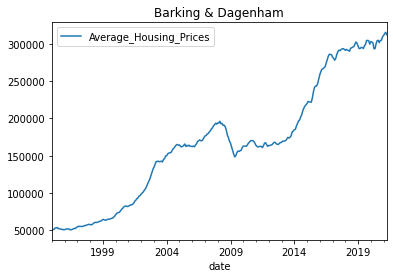

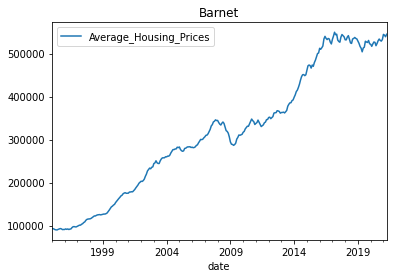

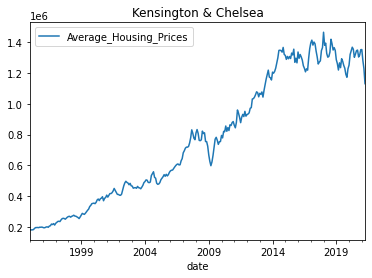

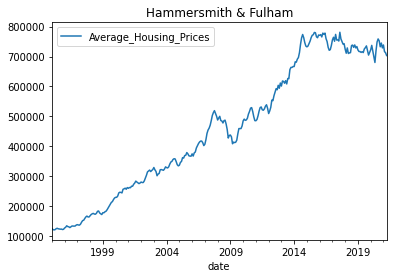

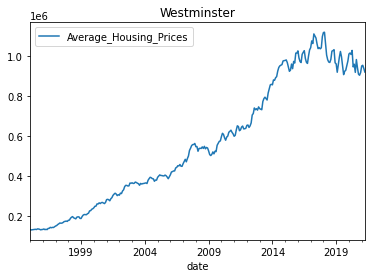

In [25]:
# POSSIBLE FIVE TOP BOROUGHS WERE SELECTED BY METHOD OF SUBSETTING, AND LINE PLOTS WERE GENERATED
# MONTH AGAINST AVERAGE PRICE
bd = london_borough_tall[london_borough_tall['borough']=='Barking & Dagenham']
br = london_borough_tall[london_borough_tall['borough']=='Barnet']
kc = london_borough_tall[london_borough_tall['borough']=='Kensington & Chelsea']
hf = london_borough_tall[london_borough_tall['borough']=='Hammersmith & Fulham']
wm = london_borough_tall[london_borough_tall['borough']=='Westminster']

bd.plot(x= "date", y = "Average_Housing_Prices", kind = "line")
plt.title("Barking & Dagenham")
plt.show()

br.plot(x= "date", y = "Average_Housing_Prices", kind = "line")
plt.title("Barnet")
plt.show()

kc.plot(x= "date", y = "Average_Housing_Prices", kind = "line")
plt.title("Kensington & Chelsea")
plt.show()

hf.plot(x= "date", y = "Average_Housing_Prices", kind = "line")
plt.title("Hammersmith & Fulham")
plt.show()

wm.plot(x= "date", y = "Average_Housing_Prices", kind = "line")
plt.title("Westminster")
plt.show()

In [26]:
# TO VISUALIZE THE ENTIRE TREND OF ALL THE LONDON BOROUGHS, PLOTLY. EXPRESS WAS ADOPTED ON THE MELTED DATAFRAME OF 
# LONG-FORMATTED FORM
import plotly.express as px
london_borough_tall = t4_properties.melt(id_vars = ['borough'], var_name = 'date', value_name = 'Average_Housing_Prices')

fig = px.line(london_borough_tall, x="date", y="Average_Housing_Prices",color = "borough",  title="London_Borough_Tall")
fig.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [27]:
## LIKE I CAN'T FIGURE THIS OUT.
# pLEASE I NEED SOME HINTS

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [28]:
# WE SUBSET THE PANDAS DATAFRAME USING MULTIPLE CONDITIONS TO OBTAIN AVERAG HOUSING PRICES OF CAMDEN FROM 1998 TO 2018.
camden_1998_2018 = london_borough_tall.loc[(london_borough_tall['date']>'1997-12-01') & (london_borough_tall['date'] <='2018-12-01') & (london_borough_tall['borough']=='Camden')]
print(camden_1998_2018.head(3))

     borough       date Average_Housing_Prices
1157  Camden 1998-01-01                 169012
1189  Camden 1998-02-01                 162345
1221  Camden 1998-03-01                 163829


In [29]:
# STILL ON CAMDEN, WE FURTHER SUBSET FOR THE PERIOD 1998
camd_98 = london_borough_tall[(london_borough_tall['date']>'1997-12-01') & (london_borough_tall['date']<='1998-12-01') & (london_borough_tall['borough']=='Camden')]
print(camd_98.head(6))

     borough       date Average_Housing_Prices
1157  Camden 1998-01-01                 169012
1189  Camden 1998-02-01                 162345
1221  Camden 1998-03-01                 163829
1253  Camden 1998-04-01                 165652
1285  Camden 1998-05-01                 169049
1317  Camden 1998-06-01                 172582


In [30]:
# STILL ON CAMDEN, WE FURTHER SUBSET FOR THE PERIOD 2018
camd_18 = london_borough_tall[(london_borough_tall['date']>'2017-12-01') & (london_borough_tall['date']<='2018-12-01') & (london_borough_tall['borough']=='Camden')]
print(camd_18.head(6))

     borough       date Average_Housing_Prices
8837  Camden 2018-01-01                 859593
8869  Camden 2018-02-01                 875078
8901  Camden 2018-03-01                 853396
8933  Camden 2018-04-01                 866438
8965  Camden 2018-05-01                 837928
8997  Camden 2018-06-01                 850613


In [31]:
# WE CREATE A FUNCTION TO DETERMINE THE RATIO OF AVVERAGE HOUSING PRICES FOR 1998 AND 2018
num_18 = len(camd_18)
num_98 = len(camd_98)

def create_price_ratio(camd_18,cam_98):
    sum_camden_18 = 0
    for e in camd_18['Average_Housing_Prices']:
        sum_camden_18 = sum_camden_18 + e
        avg_18_camden = sum_camden_18/len(camd_18)
        sum_camden_98 = 0
        for e in camd_98['Average_Housing_Prices']:
            sum_camden_98 = sum_camden_98 + e
            avg_98_camden = sum_camden_98/len(camd_98)
            ratio = avg_98_camden/avg_18_camden
    return ratio
    print(avg_98_camden)    
    print(avg_18_camden)
create_price_ratio(camd_18, camd_98)

0.20261973503252542

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

# IN THE BEGINNING
## Essential libraries were imported, and the dataset was loaded using pandas excel reader. It has 317 rows and 49 columns, with some missing values which we mugged, cleanned and manipulated to serve the required objective for the exploratory data analysis.

# DATA MANIPULATION AND EDA
## We performed renaming and transposing. We also explored the data types. Since London Borough was the area of interest, and is known to have 32 districts or borughs, we removed those boroughs that were not part of the london borough. It is this final dataframe that we applied the melt method to achieve computer friendly format.

# VISUALIZATIONS AND MODELING
## Five boroughs of the London Borughs were arbitarily seledted to visualiz average housing prices since 1995 to 2020. Barking & Dagenham has seen increase from 50000 in 1995 to closely to 300000 in 2020. Barnet started from close to 100000 in 1995 to 500000 in 2020. Similarly, Kensington & Chelsea went from 200000 to 1.4M in 2020. See the first chart.The 3 topmost boroughs (see chart 2) that have seen skyrocketed increase in average housing prices are Kensington & Chelsea, Westminster and Camden. The display was performed using Potly.express line plot.

## Finally, we modeled the ratio of average housing prices for the Camden borough between the yeears 1998 and 2018. A definition function was used, and it could be used for any other boroughs and period range. The resulted ratio, in this case, between 1998 and 2018, was apprximately 0.203 which is 5 times increasement from 1998 to 2018.